# This part is to download data from trademade
## to be done only once to download time series

In [ ]:
!pip install tradermade

# https://marketdata.tradermade.com/api/v1/tick_historical_sample/BTCUSD/2021-04-21%2008:30/2021-04-21%2009:00?api_key=MdhbUHNKNB5rdfreEqQt&format=json


In [ ]:
# returns timeseries data for the currency requested interval is daily, hourly, minute - fields is optional
# tsBTC = tm.historical(currency='BTCUSD', date="2019-10-09-13:24",interval="minute", fields=["close",])

tsBTC = tm.timeseries(currency="BTCUSD", start="2021-04-26 00:00", end="2021-04-27 18:00",interval="minute", fields=["close"], period=1)
tsBTC[:200].close.values

In [ ]:
import tradermade as tm
key = "xxxxxx put here your key xxxxxxxxx"
tm.set_rest_api_key(key)

# Init Price Timeseries and calc Volatility

In [1]:
import numpy as np
import scipy as sci
import scipy.integrate as sci_int
import matplotlib.pyplot as plt

In [2]:
#@title 1) Initiate Time Series

tsBTC = np.array([49296.25391, 49254.     , 48996.25781, 48964.25   , 48860.     ,
       49059.50391, 49164.     , 49281.00391, 49242.75   , 49621.26172,
       49649.75781, 49856.00781, 49903.00391, 49966.00781, 49970.00391,
       50263.50391, 50198.50781, 50120.25781, 50159.50391, 50240.50391,
       50104.     , 50092.75391, 50096.29688, 50136.50391, 50075.     ,
       50211.75391, 50201.19922, 50134.75   , 50150.00391, 50142.50391,
       50199.50391, 50088.25391, 50212.75391, 50377.     , 50730.5    ,
       50629.25781, 50655.     , 50657.00391, 50718.50391, 50703.50391,
       50750.75391, 50812.25   , 50914.75   , 50893.75   , 50803.25   ,
       50760.24609, 50837.75   , 50798.75   , 50757.84766, 50700.49609,
       50817.25   , 50799.10156, 50710.25391, 50644.50391, 50648.49609,
       50666.35156, 50650.25391, 50723.00391, 50808.     , 50946.75   ,
       50808.75   , 50774.50391, 50746.75   , 50684.25   , 50694.00391,
       50680.25   , 50729.99609, 50713.75391, 50732.     , 50775.00391,
       50730.40234, 50625.50391, 50642.50391, 50697.00391, 50637.75391,
       50707.50391, 50577.64844, 50535.75391, 50535.74609, 50605.25   ,
       50773.5    , 50740.25391, 50769.60156, 50749.20312, 50784.75391,
       50773.10156, 50894.00391, 50839.50391, 50875.50391, 50877.04688,
       50977.5    , 51205.25391, 51286.75781, 51345.50781, 51307.00391,
       51286.50391, 51341.     , 51352.     , 51428.5    , 51445.     ,
       51435.00391, 51676.75   , 51613.75   , 51633.     , 51540.75   ,
       51642.49609, 51537.00391, 51452.75391, 51515.00391, 51781.99609,
       51946.     , 51873.5    , 51858.75   , 51975.49609, 51963.75391,
       51802.25391, 51950.75   , 52005.     , 51917.25   , 51978.75   ,
       52265.25   , 52357.00781, 52491.25391, 52461.74609, 52268.00391,
       52284.00391, 52206.00391, 52164.25391, 52245.5    , 52149.25   ,
       52054.24609, 52156.74609, 52116.5    , 52202.74609, 52211.49609,
       52125.24609, 52137.75   , 52163.75   , 52060.75391, 51909.00391,
       51919.25   , 51983.75391, 51993.25   , 52027.00391, 51917.00391,
       51976.49609, 51968.75391, 51984.25391, 51981.00391, 51973.5    ,
       51964.     , 51885.75391, 51872.     , 51806.25391, 51785.00391,
       51893.00391, 52025.     , 51941.5    , 51858.75   , 51902.50391,
       51922.50391, 51923.25391, 51864.25391, 51904.75391, 51980.50391,
       51947.00391, 52011.50391, 51988.50391, 52012.50391, 52007.75391,
       52046.75   , 51984.     , 51947.25391, 51937.5    , 51881.75391,
       51934.75   , 51961.24609, 51941.00391, 51966.00391, 52006.5    ,
       52173.75391, 52197.5    , 52196.75391, 52225.5    , 52219.25391,
       52165.00391, 52195.50391, 52203.00391, 52138.00391, 52244.50391,
       52238.24609, 52187.00391, 52253.     , 52270.49609, 52287.50391,
       52265.5    , 52165.25   , 52184.     , 52130.25391, 52075.25391])

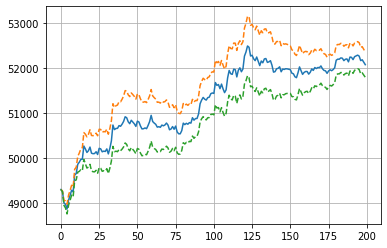

In [3]:
#@title 2) Historic Volatility
class HistVOlatility:
  def __init__(self,win):
    self.x1 = 0
    self.x2 = 0
    self.a0 = np.exp(1/win)-1
    self.a1 = 1-self.a0
    self.win = win
  def update(self,dp):
    # we assume regular timeseries
    if self.x1 == 0 and self.x2 == 0:
      self.x1 = dp
      self.x2 = dp*dp
    else:
      self.x1 = self.a0 * dp + self.a1 * self.x1
      self.x2 = self.a0 * dp*dp + self.a1 * self.x2
    return np.sqrt(self.x2-self.x1*self.x1)

hv = HistVOlatility(30)
vts=[]
for dp in tsBTC:
  vol = hv.update(dp)
  vts.append(vol)

plt.plot(tsBTC)
plt.plot(tsBTC+np.array(vts),'--')
plt.plot(tsBTC-np.array(vts),'--')
plt.grid()

# Pricing functions

In [16]:
#@title Helpers for pricing (double click to open up)
#@markdown must be initiated once

from scipy.stats import norm
from scipy.stats import mvn

# can be different, for example tabulated function
cnd = norm.cdf

_d1 = lambda S,K,VOL,TMAT: (np.log(S/K) + VOL*VOL*TMAT*0.5)/(VOL*np.sqrt(TMAT))
_d2 = lambda S,K,VOL,TMAT: _d1(S,K,VOL,TMAT) - VOL*np.sqrt(TMAT)

In [20]:
#@title European and American
#@markdown european(S, K, TMAT, VOL, OTYPE)

def european(S, K, TMAT, VOL, OTYPE):
  # it depends very much which kind of vol you put in.
  # if you supply VOL(TMAT) then set TMAT=1
  # if you supply VOL annualized, then TMAT is fraction of year

  d1 = _d1(S,K,VOL,TMAT)
  d2 = _d2(S,K,VOL,TMAT)

  price = None
  if OTYPE == 1:
    price = S*cnd(d1) - K*cnd(d2)
  elif OTYPE == -1:
    price = -S*cnd(-d1) + K*cnd(-d2)
  else:
    print('wrong option type: give +1 for call or -1 for put')
  return price

# approximation, later can be developed specific pricer
american = european

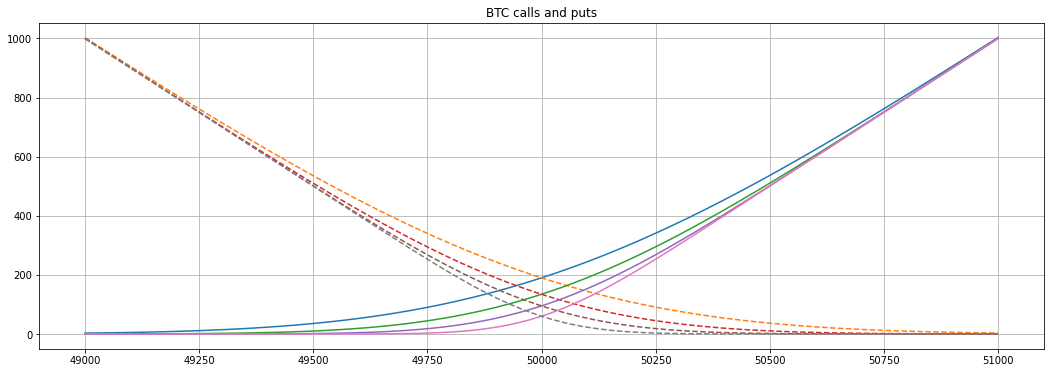

In [35]:
#@title plot European

fig = plt.figure(figsize=(18,6))

xx = np.linspace(49000,51000,100)
leg=[]

vol = vts[100]/50000

for tmat in [1.,0.5,0.25,0.1]:
  yy = []
  yy2 = []
  for x in xx:
    v = european(S=x,K=50000,TMAT=tmat, VOL=vol, OTYPE=1)
    yy.append(v)
    v2 = european(S=x,K=50000,TMAT=tmat, VOL=vol, OTYPE=-1)
    yy2.append(v2)
  plt.plot(xx,yy)
  plt.plot(xx,yy2,'--')
  # leg.append(f'Tm={tmat:.2f}')
plt.title('BTC calls and puts')
plt.grid()


In [ ]:
#@title Binary (Bet) options

def binary(Notional, S, K, TMAT, VOL, OTYPE):
  # OTYPE = +1 (call), -1 (put)
  if np.abs(OTYPE) != 1:
    print(f'Warning: OTYPE is wrong: {OTYPE}  . It must be either 1 or -1')
    return None
  return Notional * cnd(OTYPE*VOL*np.sqrt(TMAT))

One Touch Binary (ON)

$$OTYPE_{CALL} = 1 $$
$$OTYPE_{PUT} = -1 $$

$$Price_{OT}=X \cdot \{\Phi(-OTYPE\cdot d_1(S,B,\sigma_h))-\frac{B}{S}\Phi(-OTYPE\cdot d_2(S,B,\sigma_h))\}$$



In [ ]:
#@title One Touch (OT) and No-touch (NT) Binary

def ot_binary(Notional, S, K, TMAT, VOL, OTYPE):
  if np.abs(OTYPE) != 1:
    print(f'Warning: OTYPE is wrong: {OTYPE}  . It must be either 1 or -1')
    return None
  d1 = _d1(S,K,VOL,TMAT)
  d2 = _d2(S,K,VOL,TMAT)

  return Notional * (cnd(-OTYPE*d1)-K/S*cnd(-OTYPE*d1))

def nt_binaty(Notional, S, K, TMAT, VOL, OTYPE):
  return Notional - ot_binary(Notional, S, K, TMAT, VOL, OTYPE)

In [ ]:
#@title Double No-Touch (DNT) Binary


def fun_integ(x):
  return np.exp(-x)/x

def rem_error(tmat,spot,sig,z,abs_alfa,beta,pi,n):
  a = (pi*n/z)**2*0.5*sig*tmat
  err_integ=sci_int.quad(fun_integ,a,np.inf)
  b = (1+np.exp(abs_alfa*z))*np.exp(-beta*tmat)/pi
  # print(b)
  # print(err_integ)
  return b*err_integ[0]

def double_no_touch(Notional,bl,bu,tmat,spot,sig, prec=0.01):
  # E.HAUG
  z=np.log(bu/bl)
  z2=z*z
  zu=spot/bu
  zl=spot/bl
  log_zl = np.log(zl)
  pi = np.pi
  alfa = 0.5
  beta = -0.25
  zlA = zl**alfa
  zuA = zu**alfa
  alfa2=alfa*alfa
  abs_alfa=np.abs(alfa)
  sigma2T = sig*sig*tmat

  som=0
  for i in range(1,100):
    dv= 2 * pi * i  / z2 * ((zlA - (-1)**i * zuA) / (alfa2 + (i * pi / z)**2 )) * \
      np.sin(i * pi / z * log_zl) * np.exp(-0.5 * ((i * pi / z)**2 - beta) * sigma2T)
    som+=dv
    if i>10 and tmat<=0.005 and rem_error(tmat,spot,sig,z,abs_alfa,beta,pi,i+1)<prec:
      # print(f'{tmat:.3f} {i}')
      break

  return som*Notional 


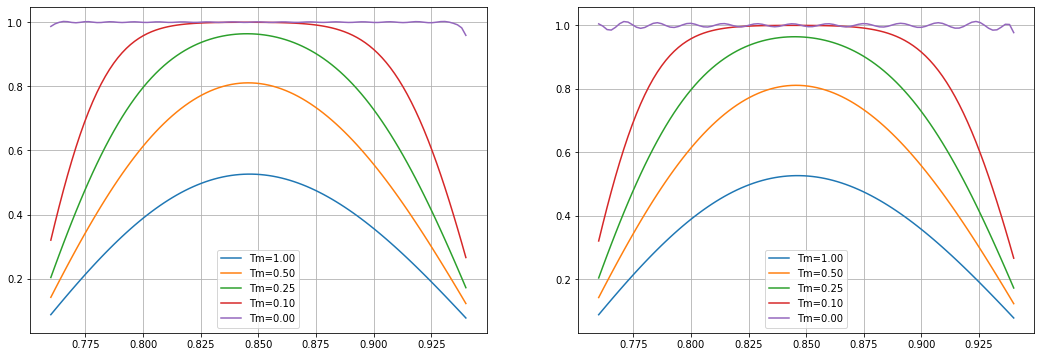

In [ ]:
#@title plot DNT (different precision)

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18,6))

xx = np.linspace(0.76,0.94,100)
leg=[]

axes=[None]*2
axes[0] = fig.add_subplot(1,2,1)
axes[1] = fig.add_subplot(1,2,2)

for tmat in [1.,0.5,0.25,0.1,1/365]:
  yy = []
  yy2 = []
  for x in xx:
    v = double_no_touch(0.75,0.95,tmat=tmat,spot=x,sig=0.1,prec=1e-15)
    yy.append(v)
    v2 = double_no_touch(0.75,0.95,tmat=tmat,spot=x,sig=0.1,prec=1e-9)
    yy2.append(v2)
  axes[0].plot(xx,yy)
  axes[1].plot(xx,yy2)
  leg.append(f'Tm={tmat:.2f}')

axes[0].legend(leg)
axes[0].grid()

axes[1].legend(leg)
axes[1].grid()

In [ ]:
#@title Double Touch (DT) Binary
#@markdown PDT=PDNT+POT.CALL+POT.PUT-X

def double_touch_binary(Notional,bl,bu,tmat,spot,sig, prec=0.01):
  dnt = double_no_touch(Notional,bl,bu,tmat,spot,sig, prec)
  pot_call = ot_binary(Notional, spot, bu, tmat, sig, OTYPE=1)
  pot_put  = ot_binary(Notional, spot, bl, tmat, sig, OTYPE=-1)
  return dnt+pot_call+pot_put-Notional